In [1]:
paths='C:\\Users\\MudraCircle\\Nehali\\balloon-loan-calculator.xlsx'
import xlwings as xw
import pandas as pd
import datetime as dt
import json
from openpyxl import load_workbook
import numpy as np

In [2]:
def balloon_loan_input(paths,loan_amt, anual_int_rate,amort_period, number_of_payment, begindate, int_allowed):
    app = xw.App()
    
   
    wb = app.books.open(paths)
    app=xw.apps.active
    sht = wb.sheets['BalloonLoan']
    date_time_str = begindate  
    begin_date = dt.datetime.strptime(date_time_str, '%Y-%m-%d')
    sht.range('D6').value =loan_amt
    sht.range('D7').value =(anual_int_rate/100)
    sht.range('D8').value =amort_period
    sht.range('D9').value = number_of_payment
    sht.range('D10').value = begin_date
    sht.range('D11').value = int_allowed
    
    input10=sht.range('D6').value 
    input20=sht.range('D7').value
    input30=sht.range('D8').value
    input40=sht.range('D9').value 
    input50=sht.range('D10').value
    input60=sht.range('D11').value
    

    wb.save()
    app.quit()
    
    return (input10 , input20, input30 , input40 , input50 , input60)
balloon_loan_input(paths,50000, 7 , 12 , 36 , '2015-2-12', 'No')

(Decimal('50000'),
 0.07,
 12.0,
 36.0,
 datetime.datetime(2015, 2, 12, 0, 0),
 'No')

In [3]:
def daily_int_rate1(paths):
    app = xw.App()
    wb = app.books.open(paths)
    app=xw.apps.active
    sht = wb.sheets['BalloonLoan']
    name=[sht.range('C15').value , sht.range('C16').value, sht.range('C17').value, sht.range('C19').value,sht.range('C20').value]
    output=[float(sht.range('D15').value) , float(sht.range('D16').value) , float(sht.range('D17').value), float(sht.range('D19').value), float(sht.range('D20').value)]
    
    c=dict(zip(name,output))
    C=json.dumps(c)
    app.quit()
    return C
    #return output ,float(output1)
daily_int_rate1(paths)

'{"Monthly Payment": 4326.34, "Balloon Payment, no rounding": -106778.5725, "Balloon Payment": -106778.55, "Total Payments": 44643.35, "Total Interest Paid": -5356.65}'

In [4]:
def amort_schedule(paths):
        app = xw.App()
        wb = app.books.open(paths)
        app=xw.apps.active
        sht = wb.sheets['BalloonLoan']

        data=pd.read_excel(paths, sheet_name='BalloonLoan')

        mydata=data.iloc[22:782,1:8]
        mydata=mydata.reset_index(drop=True)

        mydata.columns=[mydata.iloc[0,0:7].replace('\n', ' ', regex=True)]

        mydata.columns=pd.Series(mydata.iloc[0].values).replace('\n', ' ', regex=True)
        mydata.drop(index=0, inplace=True)
        mydata.reset_index()

        ind_NAN=[]
        for i in range(1,len(pd.Series(mydata['Month'].values[1:]))):
            if pd.Series(mydata['Month'].values[i]).isna().values[0]==True:
                ind_NAN.append(i)
        mydata=mydata[:ind_NAN[0]]
        data_for_json=mydata

        keys=pd.Series(data_for_json.columns.values)
        all_keys=list(pd.Series(data_for_json.columns.values))

        values=[]
        for each_col in data_for_json.columns:
            values.append(str(list(data_for_json[each_col].values.flatten())))
        final_data_dict=dict(zip(all_keys, values))

        final_dictt=json.dumps(final_data_dict)
        app.quit()
        return final_dictt
amort_schedule(paths)

'{"Month": "[nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]", "Date": "[datetime.datetime(2015, 2, 12, 0, 0), datetime.datetime(2015, 3, 12, 0, 0), datetime.datetime(2015, 4, 12, 0, 0), datetime.datetime(2015, 5, 12, 0, 0), datetime.datetime(2015, 6, 12, 0, 0), datetime.datetime(2015, 7, 12, 0, 0), datetime.datetime(2015, 8, 12, 0, 0), datetime.datetime(2015, 9, 12, 0, 0), datetime.datetime(2015, 10, 12, 0, 0), datetime.datetime(2015, 11, 12, 0, 0), datetime.datetime(2015, 12, 12, 0, 0), datetime.datetime(2016, 1, 12, 0, 0), datetime.datetime(2016, 2, 12, 0, 0), datetime.datetime(2016, 3, 12, 0, 0), datetime.datetime(2016, 4, 12, 0, 0), datetime.datetime(2016, 5, 12, 0, 0), datetime.datetime(2016, 6, 12, 0, 0), datetime.datetime(2016, 7, 12, 0, 0), datetime.datetime(2016, 8, 12, 0, 0), datetime.datetime(2016, 9, 12, 0, 0), datetime.datetime(2016, 10, 12, 0, 0), datetime.datetime(2016, 11, 12, 0

In [5]:
import matplotlib.pyplot as plt
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]
plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()
    

<Figure size 640x480 with 1 Axes>

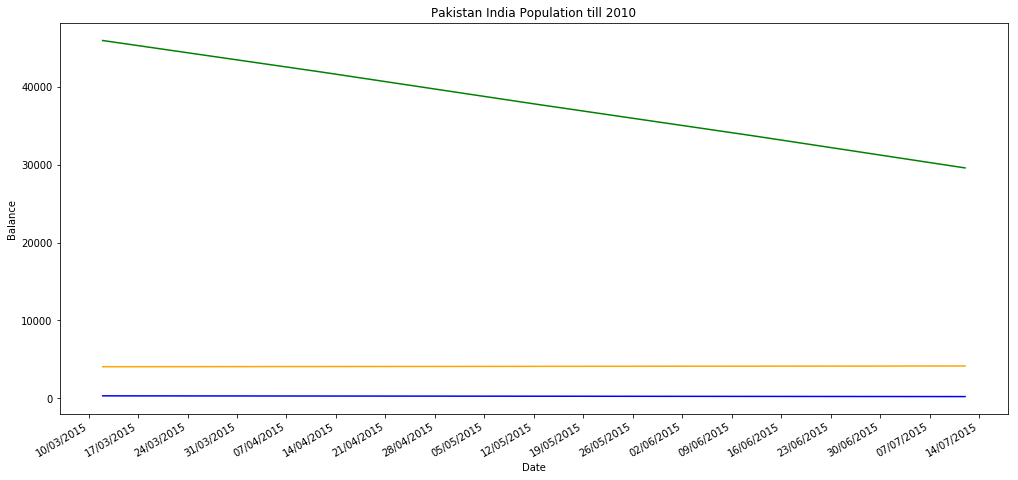

In [7]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
def amort_schedule(paths):
        app = xw.App()
        wb = app.books.open(paths)
        app=xw.apps.active
        sht = wb.sheets['BalloonLoan']

        data=pd.read_excel(paths, sheet_name='BalloonLoan')

        mydata=data.iloc[22:782,1:8]
        mydata=mydata.reset_index(drop=True)

        mydata.columns=[mydata.iloc[0,0:7].replace('\n', ' ', regex=True)]

        mydata.columns=pd.Series(mydata.iloc[0].values).replace('\n', ' ', regex=True)
        mydata.drop(index=0, inplace=True)
        mydata.reset_index()

        ind_NAN=[]
        for i in range(1,len(pd.Series(mydata['Month'].values[1:]))):
            if pd.Series(mydata['Month'].values[i]).isna().values[0]==True:
                ind_NAN.append(i)
        mydata=mydata[:ind_NAN[0]]
#         data_for_json=mydata

#         keys=pd.Series(data_for_json.columns.values)
#         all_keys=list(pd.Series(data_for_json.columns.values))

#         values=[]
#         for each_col in data_for_json.columns:
#             values.append(str(list(data_for_json[each_col].values.flatten())))
        
        x=mydata['Date'].iloc[1:6].values
        y=mydata['Balance'].iloc[1:6].values
        y1=mydata['Principal'].iloc[1:6].values
        y2=mydata['Interest'].iloc[1:6].values
        
        
        fig, ax = plt.subplots(figsize=(17,8))
        plt.plot(x,y, color='g')
        plt.plot(x,y1, color='orange')
        plt.plot(x,y2, color='b')
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())
        #set major ticks format
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
        plt.xlabel('Date')
        plt.ylabel('Balance')
        plt.title('Pakistan India Population till 2010')
        plt.gcf().autofmt_xdate()
        graph=plt.show()

        
        app.quit()
        return graph
amort_schedule(paths)